In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_data=np.linspace(0.0,10.0,1000000)

In [3]:
noise=np.random.randn(len(x_data))

In [4]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [5]:
noise

array([-1.27604127,  0.08862447,  0.56338549, ...,  0.52031673,
        0.81138452,  0.25036293])

y=mx+b
b=5


In [6]:
y_true=(0.5*x_data)+5+noise


In [7]:
x_df=pd.DataFrame(data=x_data,columns=['X Data'])

In [8]:
y_df=pd.DataFrame(data=y_true,columns=['Y'])

In [9]:
y_df.head()

,Y
0,3.723959
1,5.088629
2,5.563395
3,4.075559
4,4.511884


In [10]:
my_data=pd.concat([x_df,y_df],axis=1)

In [11]:
my_data

,X Data,Y
0,0.00000,3.723959
1,0.00001,5.088629
2,0.00002,5.563395
3,0.00003,4.075559
4,0.00004,4.511884
5,0.00005,4.426012
6,0.00006,4.449149
7,0.00007,6.549181
8,0.00008,6.771934
9,0.00009,6.286024


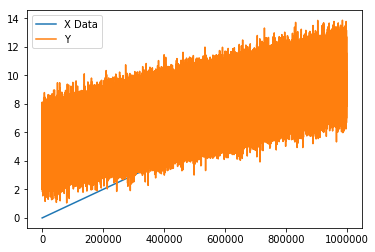

In [12]:
my_data.plot()

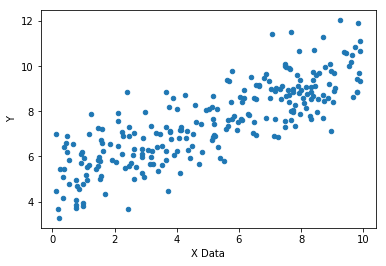

In [13]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [14]:
batch_size=8

In [15]:
np.random.randn(2)

array([-1.74603034,  0.31161366])

In [16]:
m=tf.Variable(0.48)

In [17]:
b=tf.Variable(0.03)

In [18]:
xph=tf.placeholder(tf.float32,[batch_size])

In [19]:
yph=tf.placeholder(tf.float32,[batch_size])

In [20]:
init =tf.global_variables_initializer()

In [21]:
y_model=m*xph+b

In [22]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [23]:
optimizr=tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [24]:
train=optimizr.minimize(error)

In [25]:
sess=tf.InteractiveSession()

In [26]:
sess.run(init)

In [27]:
batches=1000
for i in range(batches):
    rand_ind=np.random.randint(len(x_data),size=batch_size)
    feed_dict={xph:x_data[rand_ind],yph:y_true[rand_ind]}
    sess.run(train,feed_dict=feed_dict)

In [28]:
model_m,model_b=sess.run([m,b])

In [29]:
model_m

0.5052146

In [30]:
model_b

4.9061575

In [31]:
y_hat=x_data*model_m+model_b

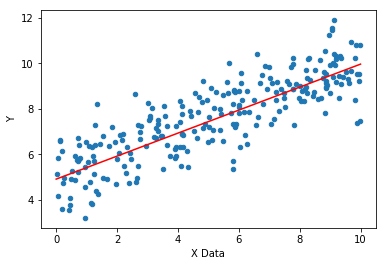

In [32]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,"r")

# TF ESTIMATOR

In [33]:
feat_cols=[tf.feature_column.numeric_column('x',shape=[1])]
feat_cols

[_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [34]:
estimator=tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\STEALE~1\\AppData\\Local\\Temp\\tmpceq79q54', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000282D998AEF0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_eval,y_train,y_eval=train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [37]:
print(x_train)

[6.83743684 5.66519567 3.97899398 ... 4.76497476 2.14539215 1.76991177]


In [38]:
print(x_eval)

[1.80580181 2.0977321  8.20631821 ... 6.52283652 9.97530998 3.97208397]


In [39]:
input_function=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [40]:
train_function=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False
                                                )

In [41]:
eval_input_function=tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False
                                                )

In [42]:
estimator.train(input_fn=input_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\STEALE~1\AppData\Local\Temp\tmpceq79q54\model.ckpt.
INFO:tensorflow:loss = 462.79187, step = 1
INFO:tensorflow:global_step/sec: 1261.6
INFO:tensorflow:loss = 55.48294, step = 101 (0.079 sec)
INFO:tensorflow:global_step/sec: 1945.9
INFO:tensorflow:loss = 22.691946, step = 201 (0.067 sec)
INFO:tensorflow:global_step/sec: 1272.44
INFO:tensorflow:loss = 13.372086, step = 301 (0.065 sec)
INFO:tensorflow:global_step/sec: 1792.05
INFO:tensorflow:loss = 19.151812, step = 401 (0.054 sec)
INFO:tensorflow:global_step/sec: 1324.7
INFO:tensorflow:loss = 4.258362, step = 501 (0.077 sec)
INFO:tensorflow:global_step/sec: 1471.41
INFO:tensorflow:loss = 6.847708, step = 601 (0.068 sec)
INFO:tensorflow:global_step/sec

In [43]:
train_mestric=estimator.evaluate(input_fn=train_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-28-02:49:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\STEALE~1\AppData\Local\Temp\tmpceq79q54\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-09-28-02:49:31
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0778699, global_step = 1000, label/mean = 7.4960613, loss = 8.622959, prediction/mean = 7.3812838
INFO:tensorflow:Saving 'checkpoint_p

In [44]:
eval_metrics=estimator.train(input_fn=eval_input_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\STEALE~1\AppData\Local\Temp\tmpceq79q54\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\STEALE~1\AppData\Local\Temp\tmpceq79q54\model.ckpt.
INFO:tensorflow:loss = 9.787762, step = 1001
INFO:tensorflow:global_step/sec: 1011.8
INFO:tensorflow:loss = 5.356724, step = 1101 (0.099 sec)
INFO:tensorflow:global_step/sec: 1921.44
INFO:tensorflow:loss = 3.3345556, step = 1201 (0.052 sec)
INFO:tensorflow:global_step/sec: 1479.58
INFO:tensorflow:loss = 5.1386666, step = 1301 (0.068 sec)
INFO:tensorflow:global_step/sec: 1524.95
INFO:tensorflow:loss = 9.346684, step = 1401 (0.066 sec)
INFO:tensorflow:global_step/sec: 1982.04
INFO:tensorflow:loss = 5.6033764, step = 1501 (0.050 sec)
INFO:tens

In [57]:
print("Train metric")
print(train_mestric)

Train metric
{'average_loss': 0.99836296, 'label/mean': 7.4975204, 'loss': 7.9869037, 'prediction/mean': 7.544386, 'global_step': 2000}


In [47]:
brand_new_data=np.linspace(0,10,10)

In [48]:
input_function_predict=tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [49]:
list(estimator.predict(input_fn=input_function_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\STEALE~1\AppData\Local\Temp\tmpceq79q54\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.922192], dtype=float32)},
 {'predictions': array([5.495695], dtype=float32)},
 {'predictions': array([6.0691986], dtype=float32)},
 {'predictions': array([6.642701], dtype=float32)},
 {'predictions': array([7.2162046], dtype=float32)},
 {'predictions': array([7.789707], dtype=float32)},
 {'predictions': array([8.363211], dtype=float32)},
 {'predictions': array([8.936714], dtype=float32)},
 {'predictions': array([9.510218], dtype=float32)},
 {'predictions': array([10.08372], dtype=float32)}]

In [50]:
perdiction=[]
for per in estimator.predict(input_fn=input_function_predict):
    perdiction.append(per['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\STEALE~1\AppData\Local\Temp\tmpceq79q54\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [67]:
perdiction

[array([5.0352416], dtype=float32),
 array([5.585909], dtype=float32),
 array([6.1365757], dtype=float32),
 array([6.6872425], dtype=float32),
 array([7.23791], dtype=float32),
 array([7.7885766], dtype=float32),
 array([8.339244], dtype=float32),
 array([8.889911], dtype=float32),
 array([9.440578], dtype=float32),
 array([9.991245], dtype=float32)]

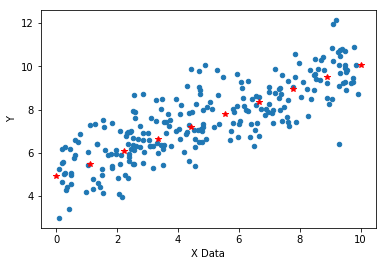

In [51]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,perdiction,'r*')